Linear regression with multiple variables**

Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [ ]:
data = pd.read_csv('Housing.csv')

Read the dataset

In [ ]:
data.head(20)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no
5,66000,4160,3,1,1,yes,yes,yes,no,yes,0,no
6,66000,3880,3,2,2,yes,no,yes,no,no,2,no
7,69000,4160,3,1,3,yes,no,no,no,no,0,no
8,83800,4800,3,1,1,yes,yes,yes,no,no,0,no
9,88500,5500,3,2,4,yes,yes,no,no,yes,1,no


In [ ]:
data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
len(data[data['lotsize']<=0])


0

In [ ]:
len(data[data['price'] <= 0])

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


In [ ]:
data.dtypes

price        int64
lotsize      int64
bedrooms     int64
bathrms      int64
stories      int64
driveway    object
recroom     object
fullbase    object
gashw       object
airco       object
garagepl     int64
prefarea    object
dtype: object

In [ ]:
data['driveway'].dtype

dtype('O')

Linear regression using gradient descent method from scratch

In [ ]:
#Number of variables in the data
data.shape[1]


12

1. Feature  normailazation
2. Cost function
3. Gradient descent
4. RMSE
5. plot

In [ ]:
# Feature normalizaton
#Min-max scaling
#X = data[['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]
X = data.iloc[:, 1:]
y = data['price'].values
#X = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
#To convert all the columns to the numerical columns from the categorical columns from the given data
num_cols = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']
cat_cols = ['driveway', 	'recroom'	,'fullbase',	'gashw'	,'airco', 'prefarea']
for col in num_cols:
  X[col] = (X[col] - X[col].mean()) / X[col].std()
X = pd.get_dummies(X, columns = cat_cols, drop_first = True)

#X.insert(0, "intercept", 1)


In [ ]:
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

In [ ]:
#Initialize the leanring rate and number of itiration
learning_rate = 0.01
num_iter = 15000

In [ ]:
#Initialize the weights
weights = np.zeros(X.shape[1])

In [ ]:
# Cost_function
def cost_funtion(X, y, weights):
    m = len(y)
    y_hat = X.dot(weights)
    errors = np.substract(y_hat,y)
    #sqr_error = np.square(errors)
    J = 1/(m) * np.sum((y_hat - y)**2)
    return J

In [ ]:
#Gradient decent
for i in range(num_iter):
    # Calculate the predicted values
    y_hat = X.dot(weights)
    # Calculate the error
    errors = np.subtract(y_hat,y)
    # Calculate the gradient of the cost function with respect to weights
    gradient = (2 / len(X)) * np.dot(X.T, errors)
    # Update the weights using the gradients
    weights -= learning_rate * gradient

print("Optimum weights:", weights)

Optimum weights: [52881.4147803   7688.9478887   1350.89729246  7198.713657
  5692.75702498  3656.09953842  6687.77726071  4511.28389329
  5452.38569252 12831.38472376 12632.88811319  9369.51248515]


In [ ]:
type(weights)

numpy.ndarray

In [ ]:
#Root Mean Squared Error (RMSE) after optimization
m = len(X)
y_hat = X.dot(weights)
J = np.sqrt(1/(m) * np.sum((y_hat - y)**2))
print("RMSE: ", J)

RMSE:  15252.7588115565


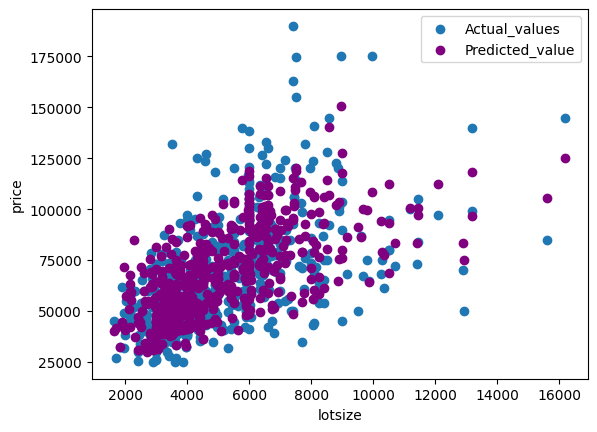

In [ ]:
#Plot ‘price’ vs ‘lotsize’ for gradient descent
plt.scatter(data['lotsize'], y, label="Actual_values")
plt.scatter(data['lotsize'], X.dot(weights), color='purple', label="Predicted_value")
plt.xlabel('lotsize')
plt.ylabel('price')
plt.legend()
plt.show()

Linear regression using Normal equation

Find the optimum Weights using Normal equation

In [ ]:
#Normal equation formula
weights_Norm = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("The Optimal value for Normalequation:  " , weights_Norm)

The Optimal value for Normalequation:   [52881.41142848  7688.94772689  1350.89725472  7198.7133627
  5692.75666365  3656.09903403  6687.77889042  4511.28382611
  5452.38553945 12831.40626641 12632.89040482  9369.51323893]


The weight values and the Root Mean Squared Error

In [ ]:
#RMSE
#Root Mean Squared Error (RMSE) after optimization
m = len(X)
y_predict = X.dot(weights_Norm)
J = np.sqrt(1/(m) * np.sum((y_predict - y)**2))
print("RMSE: ", J)

RMSE:  15252.758811555846


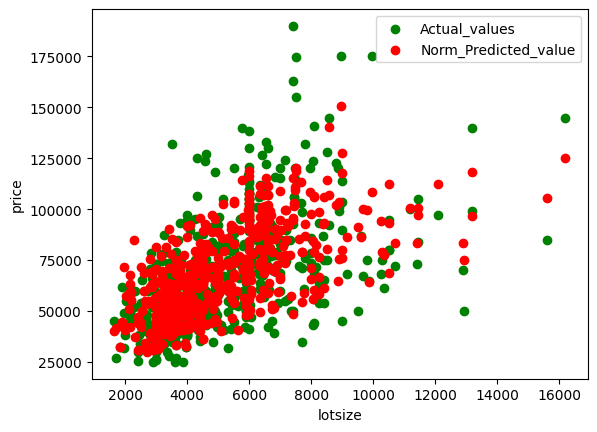

In [ ]:
#Plot ‘price’ vs ‘lotsize’ for Normal Equation
plt.scatter(data['lotsize'], y, color='green', label="Actual_values")
plt.scatter(data['lotsize'], X.dot(weights_Norm), color='red', label="Norm_Predicted_value")
plt.xlabel('lotsize')
plt.ylabel('price')
plt.legend()
plt.show()

 Linear regression using scikit-learn linear regression model

Import the libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

The optimum Weights using linear regression algorithm from scikit-learn library

In [ ]:
model_LR = LinearRegression()
model_LR.fit(X[:, 1:], y)
Optimal_weights_LR = model_LR.coef_
num_iter = model_LR.intercept_
Y = model_LR.predict(X[:, 1:])
RMSE = np.sqrt(mean_squared_error(y, Y))
print("Optimal weight values for LR:", [model_LR.intercept_] + list(model_LR.coef_))
print("RMSE:", RMSE)

Optimal weight values for LR: [52881.41142848307, 7688.947726893454, 1350.897254718253, 7198.713362696465, 5692.756663648803, 3656.099034027472, 6687.778890416114, 4511.283826105545, 5452.385539447683, 12831.406266411808, 12632.890404815887, 9369.51323892888]
RMSE: 15252.758811555845


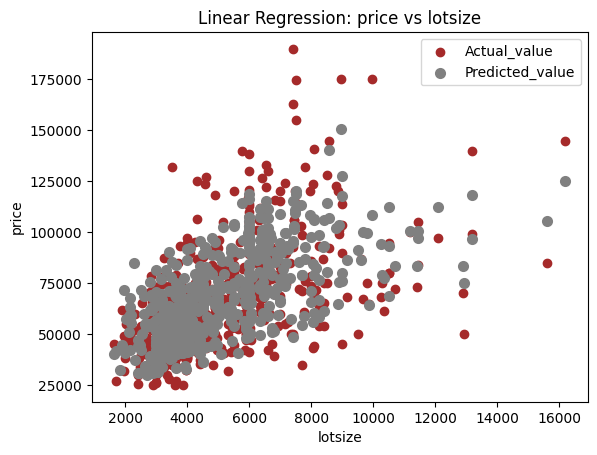

In [ ]:
plt.scatter(data['lotsize'], y, color='brown', label='Actual_value')
plt.scatter(data['lotsize'], Y, color='gray', linewidth=2, label='Predicted_value')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.legend()
plt.title('Linear Regression: price vs lotsize')
plt.show()

**Linear regression with Regularization**

Split the data into training/testing data set with the ratio of 70% / 30% to check overfitting

random state=123 for splitting the data

2(a). Fit the training data using 5th order polynomial regression model and Ridge (L2 penalty)
regularization

Import the libraries for training the model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [ ]:
data = pd.read_csv('Housing.csv')

In [ ]:
Train_data, Test_data = train_test_split(data, test_size=0.3, random_state=123)

X_train and X_test variables store the features of the training and testing datasets, which, in this particular case, refer to the 'lotsize' feature.

In [ ]:
X_train = Train_data[['lotsize']]
X_test = Test_data[['lotsize']]

y_train and y_test variables refer to the target variable and output variable, respectively, of the training and testing datasets.

In [ ]:
y_train = Train_data[['price']]
y_test = Test_data[['price']]

In [ ]:
#Create polynomial features of degree 5 without an intercept term, transforming the original training and testing data features
polynominal = PolynomialFeatures(degree = 5, include_bias = False)
X_train_poly = polynominal.fit_transform(X_train)
X_test_poly = polynominal.transform(X_test)

In [ ]:
#Standardizing the features obtain from the polynominal transform
scaler = StandardScaler().fit(X_train_poly)
X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

- The algorithm performs ridge regression, which are provided in the list Lambda. For each lambda value, the weights of the ridge model are saved along with the mean squared errors for the training and testing datasets.

- The code then determines the lambda value that results in the smallest test error and outputs this value. It uses the ideal lambda to fit a ridge regression model and prints the model's intercept and coefficients (weights).

- These coefficients indicate which features have a significant influence on the prediction of the target variable.

In [ ]:
Lambda = [0.1, 0.5, 1, 5, 10]
Train_Errors, Test_Errors, weights_ridge = [], [], []
for L in Lambda:
    ridge = Ridge(alpha=L)
    ridge.fit(X_train_poly, y_train)

    y_train_predict = ridge.predict(X_train_poly)
    y_test_predict = ridge.predict(X_test_poly)

    Train_Errors.append(mean_squared_error(y_train, y_train_predict))
    Test_Errors.append(mean_squared_error(y_test, y_test_predict))

    weights_ridge.append(ridge.coef_[0])

Final_lamda_value = Lambda[np.argmin(Test_Errors)]
print(f"The Final_lamda_value: {Final_lamda_value}")

# Printing the weights of the model with optimal lambda
optimal_ridge = Ridge(alpha=Final_lamda_value)
optimal_ridge.fit(X_train_poly, y_train)
print("Optimal weight_L2: ", [optimal_ridge.intercept_] + list(optimal_ridge.coef_))


The Final_lamda_value: 0.1
Optimal weight_L2:  [array([68897.2513089]), array([  7259.10823033,  55897.02186896, -47880.66351507, -54366.80716495,
        54291.24767187])]


Plot weight coefficients with the different L2 penalty value, λ

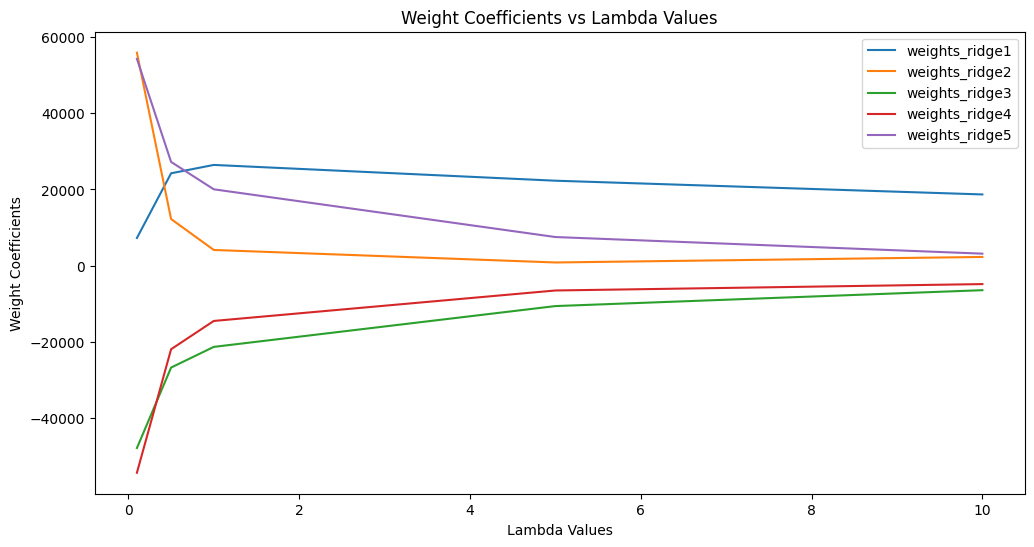

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(len(weights_ridge[0])):
    plt.plot(Lambda, [weight[i] for weight in weights_ridge], label='weights_ridge{}'.format(i+1))
plt.xlabel('Lambda Values')
plt.ylabel('Weight Coefficients')
plt.title('Weight Coefficients vs Lambda Values')
plt.legend()
plt.show()

plot ‘price’ vs ‘lotsize’)

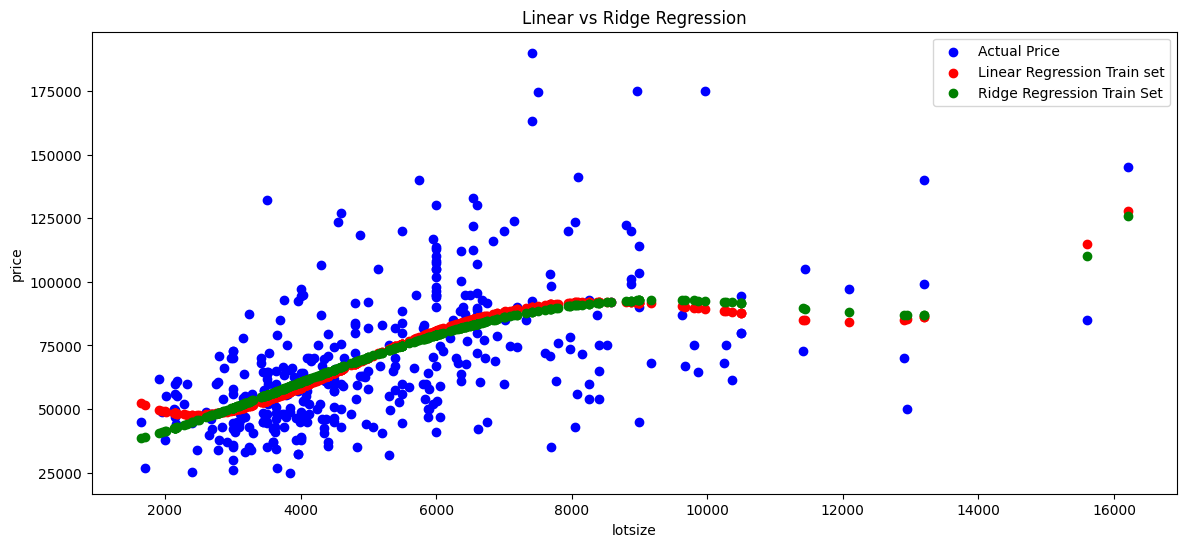

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_poly, y_train)
plt.figure(figsize=(14, 6))
plt.scatter(Train_data[['lotsize']], y_train, color='blue', label='Actual Price')
plt.scatter(Train_data[['lotsize']], linear_reg.predict(X_train_poly), color='red', label='Linear Regression Train set')
plt.scatter(Train_data[['lotsize']], optimal_ridge.predict(X_train_poly), color='green', label='Ridge Regression Train Set')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('Linear vs Ridge Regression')
plt.legend()
plt.show()

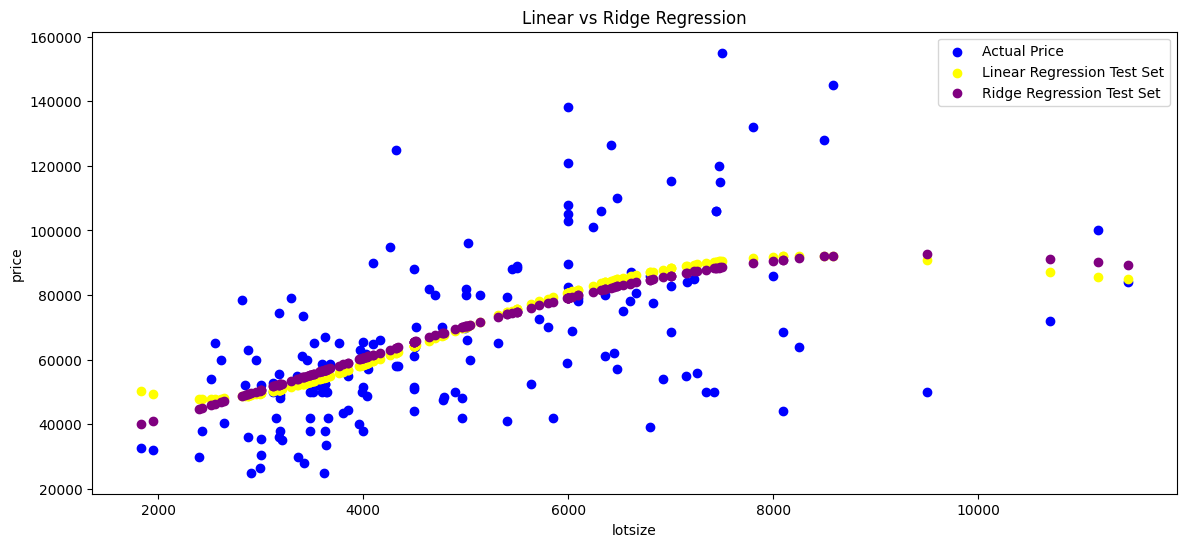

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_poly, y_train)
plt.figure(figsize=(14, 6))
plt.scatter(Test_data[['lotsize']], y_test, color='blue', label='Actual Price')
plt.scatter(Test_data[['lotsize']], linear_reg.predict(X_test_poly), color='yellow', label='Linear Regression Test Set')
plt.scatter(Test_data[['lotsize']], optimal_ridge.predict(X_test_poly), color='purple', label='Ridge Regression Test Set')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('Linear vs Ridge Regression')
plt.legend()
plt.show()

- To evaluate the accuracy of a ridge regression model, the root mean squared error (RMSE) is calculated for both the training and testing datasets using different lambda values from a list called Lambda.

- The ridge model's weights are saved for each lambda value. The code finds the lambda value that produces the lowest test RMSE and outputs this value.

- It also displays the RMSE values for both the training and test datasets, which helps to assess the model's performance on these datasets.

In [ ]:
Lambda = [0.1, 0.5, 1, 5, 10]
Train_RMSE, Test_RMSE, weights = [], [], []
for L in Lambda:
    ridge = Ridge(alpha=L)
    ridge.fit(X_train_poly, y_train)
    y_train_predict = ridge.predict(X_train_poly)
    y_test_predict = ridge.predict(X_test_poly)
    Train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
    Test_RMSE.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))
    weights.append(ridge.coef_)
Final_lambda_value = Lambda[np.argmin(Test_RMSE)]
print(f"The Final_lambda_value: {Final_lambda_value}")
print(f"RMSE for Training Data: {Train_RMSE[Lambda.index(Final_lambda_value)]}")
print(f"RMSE for Test Data: {Test_RMSE[Lambda.index(Final_lambda_value)]}")

The Final_lambda_value: 0.1
RMSE for Training Data: 22182.22507623299
RMSE for Test Data: 20443.634477381016



**Fit the training data using 5th order polynomial regression model and Lasso (L1 penalty) regularization**

**You need to try at least 5 different L1 penalty (for example, λ = 0.1, 0.5, 1, 5, 10)**

**Search optimum L1 penalty, λ based on Root Mean Squared Error (RMSE) of train/test data Plot weight coefficients with the different L1 penalty value, λ**.

**Please fit the train/test data using the Linear regression model with and without the optimum L1 regularization (Please plot ‘price’ vs ‘lotsize’)**.

**Print out the optimized weight values based on the optimum L1 penalty value, λ**.

**Print out Root Mean Squared Error (RMSE) for training/test data based on the optimum L1 penalty value, λ**.


Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

- The code uses different lambda values from a list to execute Lasso regression.

- The weights and mean squared error are calculated for each value on the training and testing datasets.

-  The lambda value that results in the smallest test error is used to train a Lasso regression model, and the printed weights include the intercept and coefficients.

In [ ]:
Lambdas = [0.1, 0.5, 1, 5, 10]
Train_Errors_lasso, Test_Errors_lasso, weights_lasso = [], [], []

for L in Lambdas:
    lasso = Lasso(alpha=L, max_iter= 100000) # Larger the irteration it helps in convergence of the value.
    lasso.fit(X_train_poly, y_train)
    y_train_predict_lasso = lasso.predict(X_train_poly)
    y_test_predict_lasso = lasso.predict(X_test_poly)

    Train_Errors_lasso.append(mean_squared_error(y_train, y_train_predict_lasso))
    Test_Errors_lasso.append(mean_squared_error(y_test, y_test_predict_lasso))

    weights_lasso.append(lasso.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.725e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.873e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e+09, tolerance: 2.799e

In [ ]:
# Find the lambda value that gives the lowest testing error
Test_Errors_lasso = np.array(Test_Errors_lasso)
Final_lambda_value = Lambdas[np.argmin(Test_Errors_lasso)]
print(f"The Final_lambda_value: {Final_lambda_value}")

# Fit the Lasso model with the optimal lambda value
optimal_lasso = Lasso(alpha=Final_lambda_value, max_iter=100000)
optimal_lasso.fit(X_train_poly, y_train)
print("Optimal weight: ", [optimal_lasso.intercept_] + list(optimal_lasso.coef_))

The Final_lambda_value: 0.1
Optimal weight:  [array([68897.2513089]), -53302.80858269442, 263435.8002417411, -329126.6189200629, 112991.31720562676, 21102.945769229576]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.725e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(


 Plot weight coefficients with the different L1 penalty value, λ.

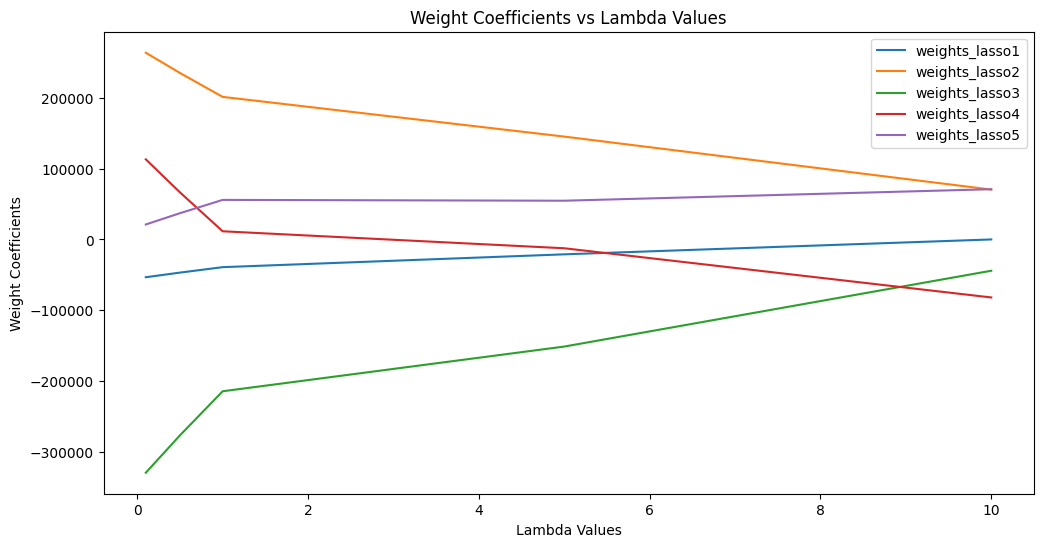

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for i in range(len(weights_lasso[0])):
    plt.plot(Lambdas, [weight[i] for weight in weights_lasso], label='weights_lasso{}'. format(i+1))
plt.xlabel('Lambda Values')
plt.ylabel('Weight Coefficients')
plt.title('Weight Coefficients vs Lambda Values')
plt.legend()
plt.show()

 plot ‘price’ vs ‘lotsize’)

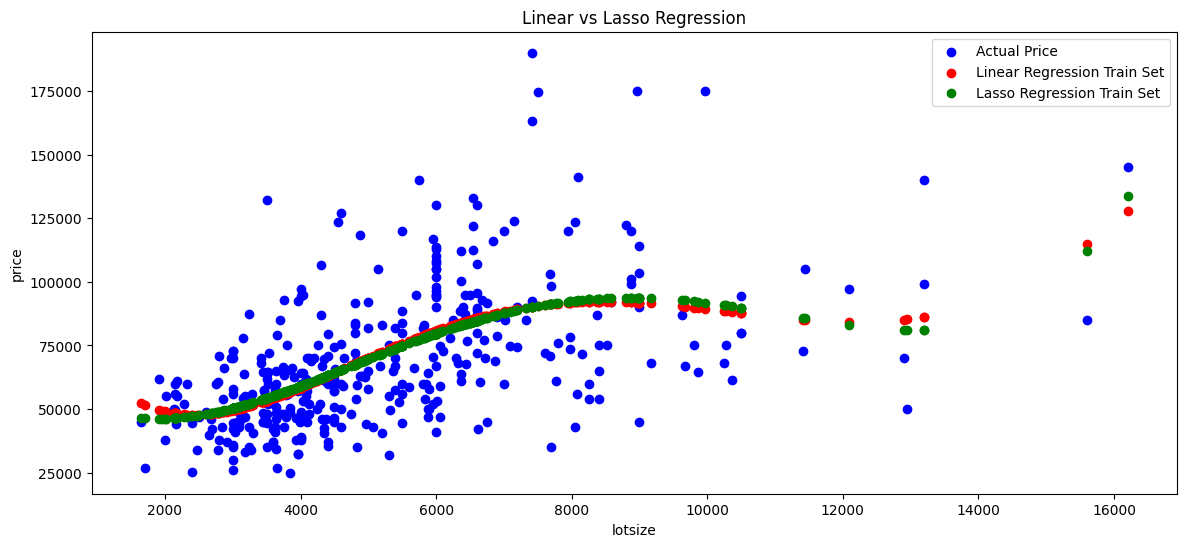

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_poly, y_train)
plt.figure(figsize=(14, 6))
plt.scatter(Train_data[['lotsize']], y_train, color='blue', label='Actual Price')
plt.scatter(Train_data[['lotsize']], linear_reg.predict(X_train_poly), color='red', label='Linear Regression Train Set')
plt.scatter(Train_data[['lotsize']], optimal_lasso.predict(X_train_poly), color='green', label='Lasso Regression Train Set')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('Linear vs Lasso Regression')
plt.legend()
plt.show()

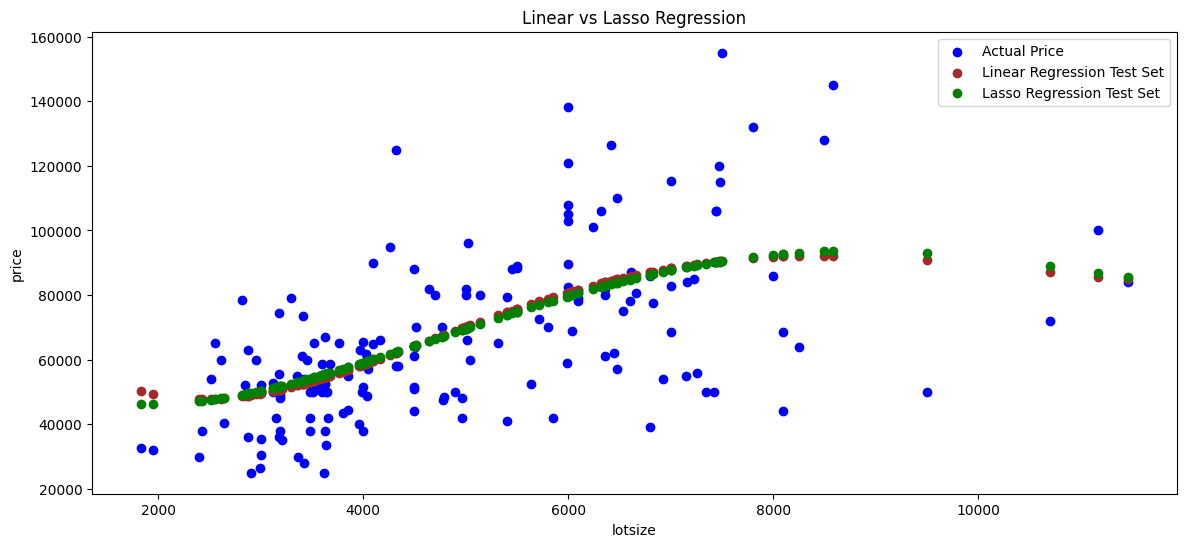

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_poly, y_train)
plt.figure(figsize=(14, 6))
plt.scatter(Test_data[['lotsize']], y_test, color='blue', label='Actual Price')
plt.scatter(Test_data[['lotsize']], linear_reg.predict(X_test_poly), color='brown', label='Linear Regression Test Set')
plt.scatter(Test_data[['lotsize']], optimal_lasso.predict(X_test_poly), color='green', label='Lasso Regression Test Set')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('Linear vs Lasso Regression')
plt.legend()
plt.show()

- The code uses the best Lasso regression model to predict the target variable for both training and test datasets.

- The predicted values are stored in y_train_pred_optimal and y_test_pred_optimal.

- The root mean squared error (RMSE) is calculated using the predicted and actual values to measure the model's performance on the datasets.

In [ ]:
# Predict using the optimal lasso model
y_train_pred_optimal = optimal_lasso.predict(X_train_poly)
y_test_pred_optimal = optimal_lasso.predict(X_test_poly)

# Calculate RMSE for training and test datasets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_optimal))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_optimal))

print(f"RMSE for Training Data: {rmse_train}")
print(f"RMSE for Test Data: {rmse_test}")


RMSE for Training Data: 22087.361005581293
RMSE for Test Data: 20407.6387115389
